# Forecasting Exercises
This exercise uses a  time series of California Hospitality Industry Employees.

<div class="alert alert-danger" style="margin: 10px"><strong>IMPORTANT NOTE!</strong> Make sure you don't run the cells directly above the example output shown, <br>otherwise you will end up writing over the example output!</div>

In [1]:
from pmdarima import auto_arima 

In [2]:
# RUN THIS CELL
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('/Users/stephaniekendall/Desktop/Flatiron/nyc-ds-100719-lectures/week-11/Time_Series/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

348
            Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7


So <tt>df</tt> has 348 records and one column. The data represents the number of employees in thousands of persons as monthly averages from January, 1990 to December 2018.

### 1. Plot the source data
Create a line chart of the dataset. Optional: add a title and y-axis label.

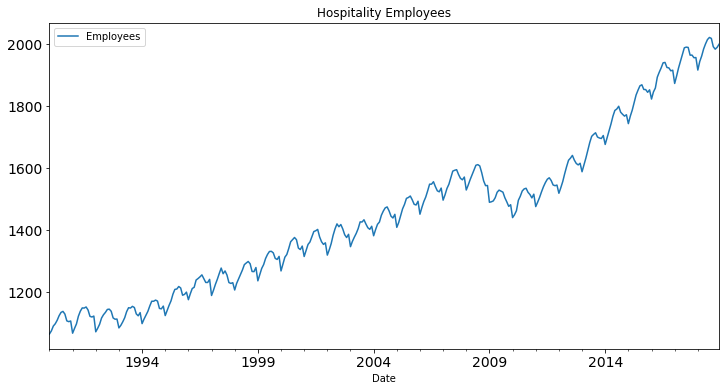

In [3]:
## CODE HERE

df.plot(figsize=(12,6), title = 'Hospitality Employees', fontsize = 14)




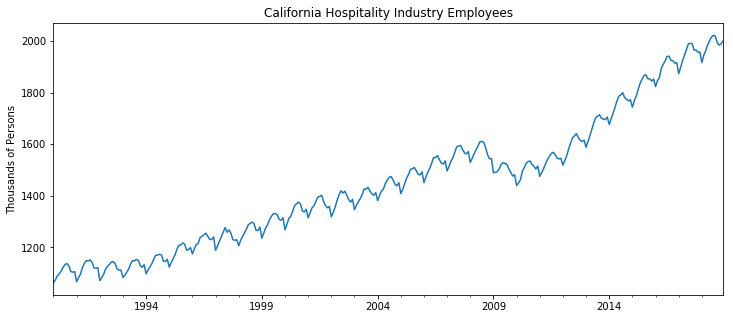

In [2]:
# DON'T WRITE HERE

### 2. Run an ETS Decomposition
Use an 'additive' model.

<Figure size 432x288 with 0 Axes>

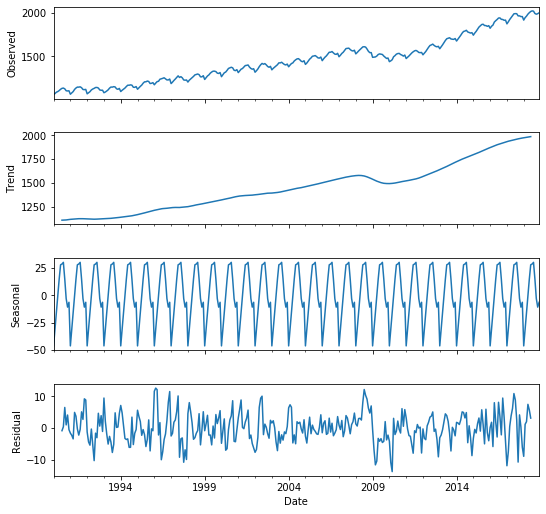

In [4]:
import matplotlib.pyplot as plt
decomposition = seasonal_decompose(df, freq=12 )
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(8, 8)

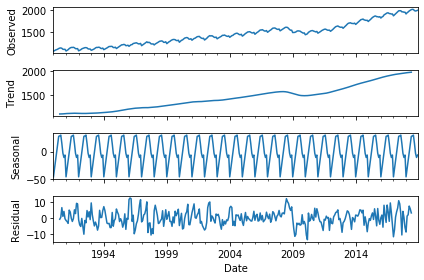

In [28]:
result = seasonal_decompose(df['Employees'], model='add')
result.plot();

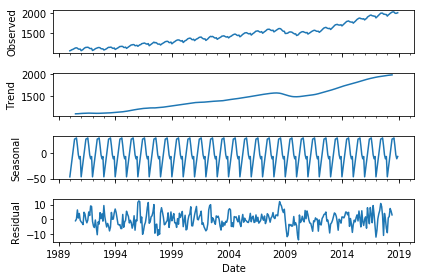

In [3]:
# DON'T WRITE HERE

### 3. Test to see if the data is currently stationary. If not transform the data to make it more stationary.  




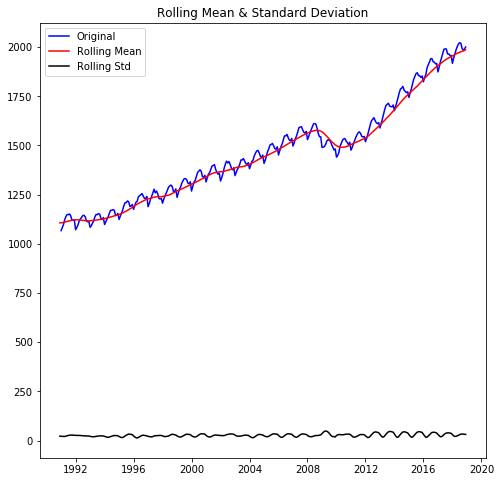

Results of Dickey-Fuller Test:
Test Statistic                   0.901284
p-value                          0.993107
#Lags Used                      17.000000
Number of Observations Used    330.000000
Critical Value (1%)             -3.450322
Critical Value (5%)             -2.870338
Critical Value (10%)            -2.571458
dtype: float64


In [5]:
from statsmodels.tsa.stattools import adfuller

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(8, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(df.Employees,12)

#### Log Transformation

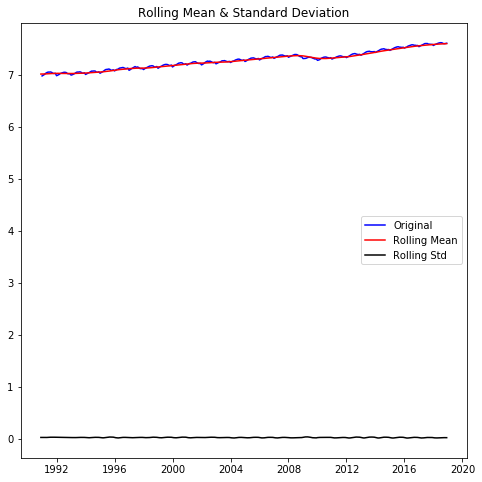

Results of Dickey-Fuller Test:
Test Statistic                   0.376334
p-value                          0.980588
#Lags Used                      17.000000
Number of Observations Used    330.000000
Critical Value (1%)             -3.450322
Critical Value (5%)             -2.870338
Critical Value (10%)            -2.571458
dtype: float64


In [6]:
df['natural_log'] = df.Employees.apply(lambda x: np.log(x))  
test_stationarity(df.natural_log, 12)

#### First Difference

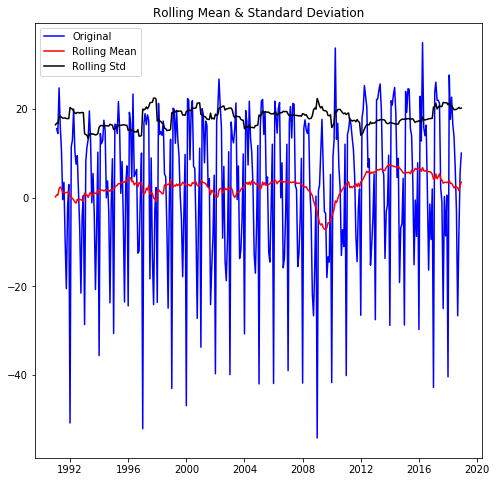

Results of Dickey-Fuller Test:
Test Statistic                  -3.068279
p-value                          0.028992
#Lags Used                      17.000000
Number of Observations Used    329.000000
Critical Value (1%)             -3.450384
Critical Value (5%)             -2.870365
Critical Value (10%)            -2.571472
dtype: float64


In [8]:
df['first_difference'] = df.Employees - df.Employees.shift(1)  
test_stationarity(df.first_difference.dropna(inplace=False),12)

#### Seasonal Difference

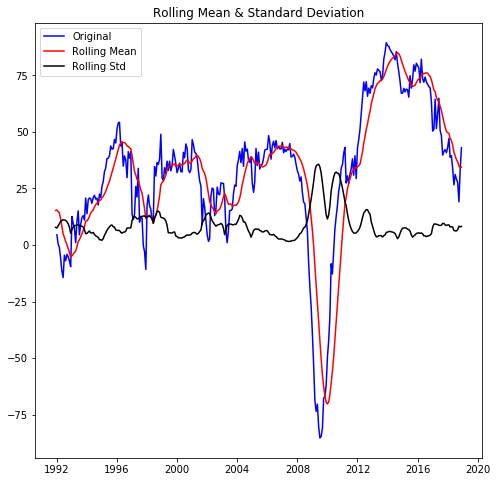

Results of Dickey-Fuller Test:
Test Statistic                  -2.570485
p-value                          0.099252
#Lags Used                      15.000000
Number of Observations Used    320.000000
Critical Value (1%)             -3.450952
Critical Value (5%)             -2.870615
Critical Value (10%)            -2.571605
dtype: float64


In [7]:
df['seasonal_difference'] = df.Employees - df.Employees.shift(12)  
test_stationarity(df.seasonal_difference.dropna(inplace=False), 12)

#### Seasonal Difference of the First difference

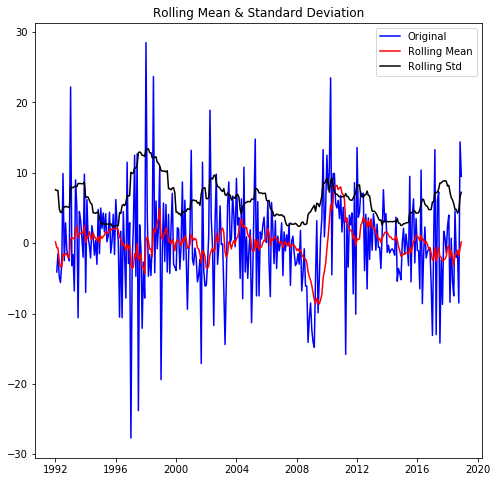

Results of Dickey-Fuller Test:
Test Statistic                -6.555191e+00
p-value                        8.651806e-09
#Lags Used                     1.100000e+01
Number of Observations Used    3.230000e+02
Critical Value (1%)           -3.450759e+00
Critical Value (5%)           -2.870530e+00
Critical Value (10%)          -2.571560e+00
dtype: float64


In [9]:
df['seasonal_first_difference'] = df.first_difference - df.first_difference.shift(12)  
test_stationarity(df.seasonal_first_difference.dropna(inplace=False), 12)

#### Log First Difference

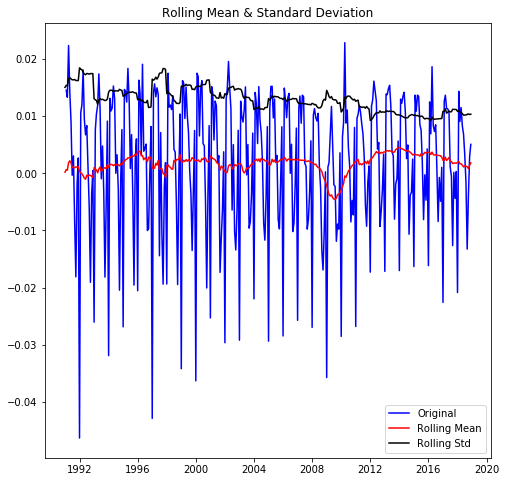

Results of Dickey-Fuller Test:
Test Statistic                  -3.273291
p-value                          0.016115
#Lags Used                      17.000000
Number of Observations Used    329.000000
Critical Value (1%)             -3.450384
Critical Value (5%)             -2.870365
Critical Value (10%)            -2.571472
dtype: float64


In [10]:
df['log_first_difference'] = df.natural_log - df.natural_log.shift(1)  
test_stationarity(df.log_first_difference.dropna(inplace=False), 12)

#### Log Seasonal First Difference

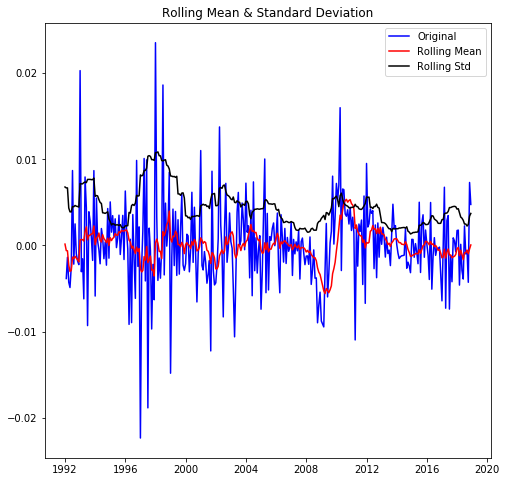

Results of Dickey-Fuller Test:
Test Statistic                -6.667123e+00
p-value                        4.687077e-09
#Lags Used                     1.100000e+01
Number of Observations Used    3.230000e+02
Critical Value (1%)           -3.450759e+00
Critical Value (5%)           -2.870530e+00
Critical Value (10%)          -2.571560e+00
dtype: float64


In [11]:
df['log_seasonal_first_difference'] = df.log_first_difference - df.log_first_difference.shift(12)
test_stationarity(df.log_seasonal_first_difference.dropna(inplace=False), 12)


### 4. Graph the ACF and PACF plots of your stationary data to determine the possible parameters for the ARIMA or SARIMA model.

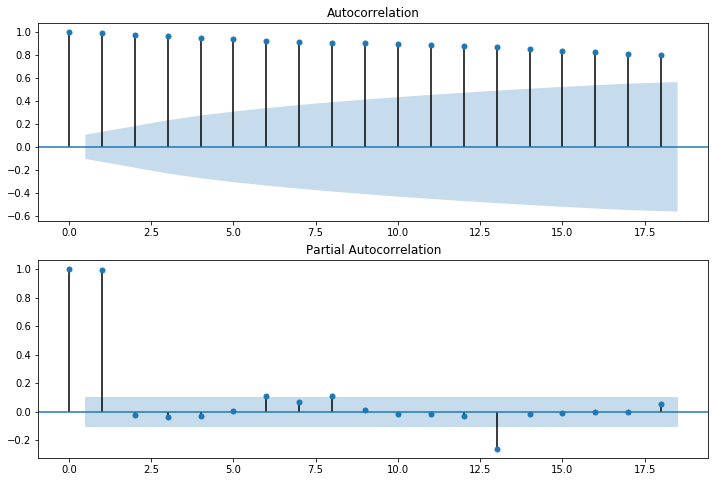

In [12]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(df.Employees.iloc[1:], lags=18, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(df.Employees.iloc[1:], lags=18, ax=ax2)

#### First Difference

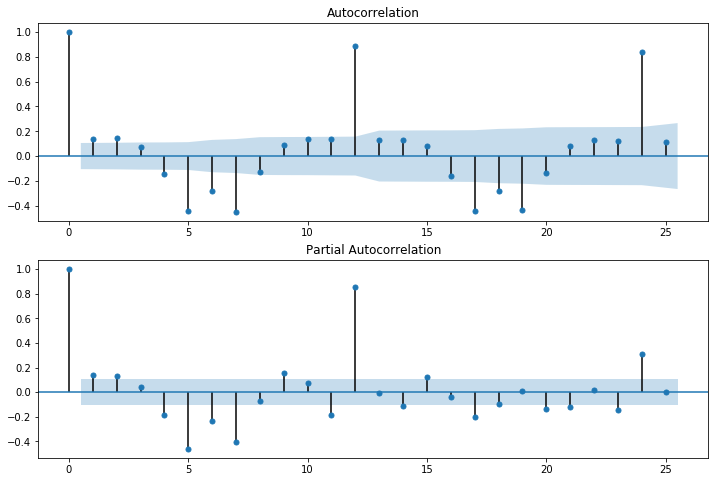

In [13]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(df.first_difference.iloc[1:], lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(df.first_difference.iloc[1:], lags=25, ax=ax2)

#### Seasonal Difference

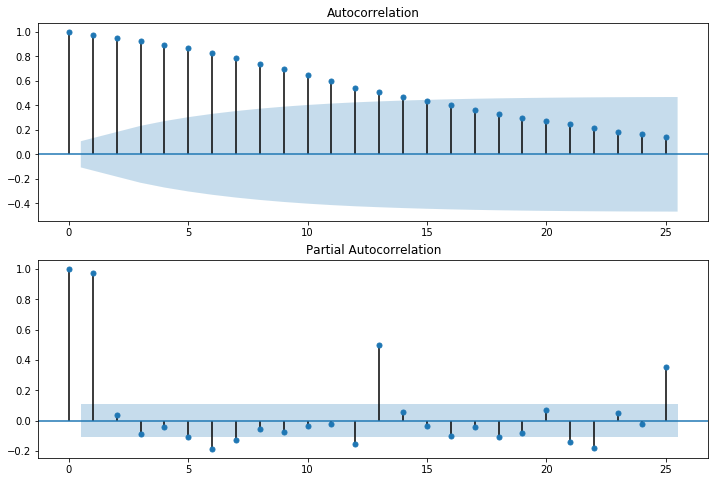

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(df.seasonal_difference.iloc[13:], lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(df.seasonal_difference.iloc[13:], lags=25, ax=ax2)

#### Seasonal First Difference

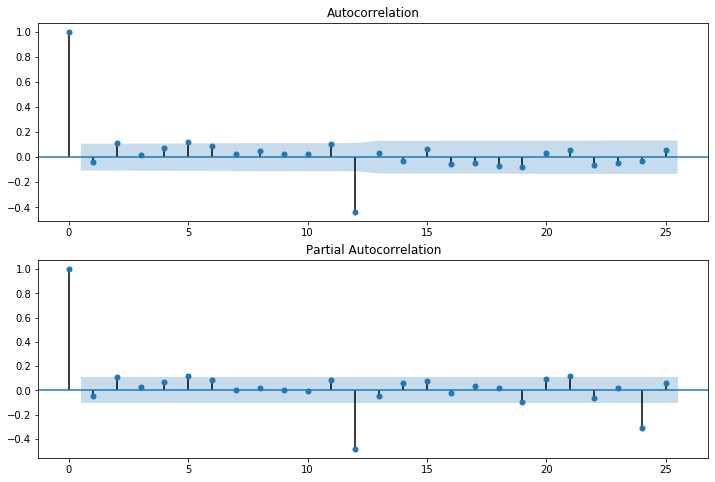

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(df.seasonal_first_difference.iloc[13:], lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(df.seasonal_first_difference.iloc[13:], lags=25, ax=ax2)

#### Log First Difference

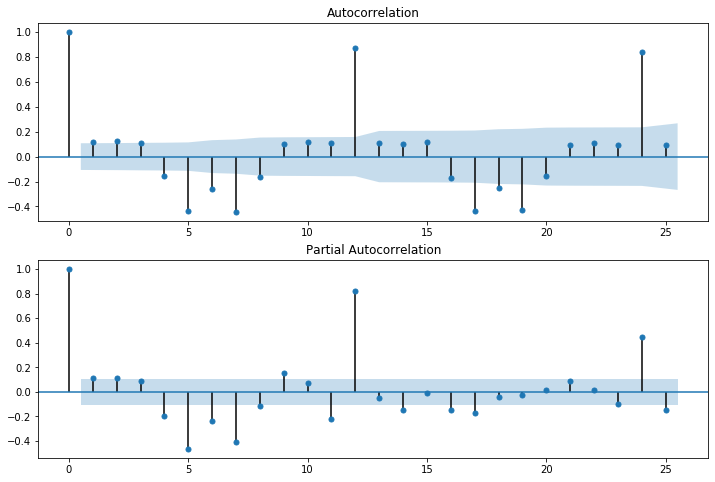

In [16]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(df.log_first_difference.iloc[13:], lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(df.log_first_difference.iloc[13:], lags=25, ax=ax2)

#### Log Seasonal First Diff

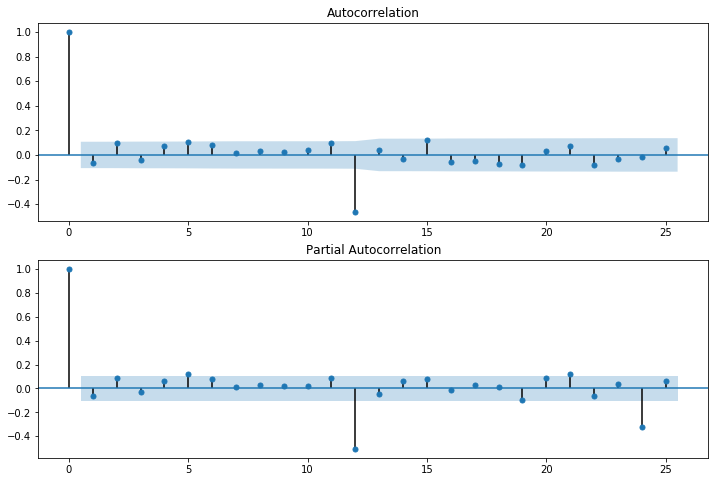

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
#plot the ACF
fig = sm.graphics.tsa.plot_acf(df.log_seasonal_first_difference.iloc[13:], lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
#plot the PACF
fig = sm.graphics.tsa.plot_pacf(df.log_seasonal_first_difference.iloc[13:], lags=25, ax=ax2)

In [ ]:
# write your ideal parameters here.

# 1, 12

In [65]:
df.head()

,Employees,natural_log,first_difference,seasonal_difference,seasonal_first_difference
Date,,,,,
1990-01-01,1064.5,6.970260,NaN,NaN,NaN
1990-02-01,1074.5,6.979611,10.0,NaN,NaN
1990-03-01,1090.0,6.993933,15.5,NaN,NaN
1990-04-01,1097.4,7.000699,7.4,NaN,NaN
1990-05-01,1108.7,7.010943,11.3,NaN,NaN


### 5. Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [18]:
auto_arima(df['log_first_difference'].iloc[13:],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  335
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 12)   Log Likelihood                1354.803
Date:                            Fri, 20 Dec 2019   AIC                          -2693.606
Time:                                    11:19:06   BIC                          -2663.093
Sample:                                         0   HQIC                         -2681.441
                                            - 335                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.257e-07   1.07e-05      0.068      0.946   -2.03e-05    2.17e-05
ar.L1          0.6726      0.153      4.400      0.000       0.373       0.972
ar.L2          0.1644      0.075      2.192      0.028       0.017       0.311
ma.L1         -0.7098      0.136     -5.217      0.000      -0.976      -0.443
ar.S.L12       0.7982      0.070     11.462      0.000       0.662       0.935
ar.S.L24       0.1828      0.067      2.724      0.006       0.051       0.314
ma.S.L12      -0.5752      0.062     -9.334      0.000      -0.696      -0.454
sigma2      1.659e-05   1.01e-06     16.497      0.000    1.46e-05    1.86e-05
===================================================================================
Ljung-Box (Q):                       32.40   Jarque-Bera (JB):               293.19
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                            -0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

You should see a recommended ARIMA Order of (0,1,0) combined with a seasonal order of (2,0,0,12).
### 6. Split the data into train/test sets
Set one year (12 records) for testing. There is more than one way to do this!

In [19]:
len(df)

348

In [19]:
train = df['Employees'].iloc[:336]
test = df['Employees'].iloc[336:]

In [5]:
# DON'T WRITE HERE

### 7. Fit a SARIMA(0,1,0)(2,0,0,12) model to the training set

In [20]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 0),
                                seasonal_order=(2, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1003.189
Date:                            Fri, 20 Dec 2019   AIC                           2012.378
Time:                                    11:19:08   BIC                           2023.597
Sample:                                01-01-1990   HQIC                          2016.862
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5240      0.040     13.012      0.000       0.445       0.603
ar.S.L24       0.4376      0.042     10.385      0.000       0.355       0.520
sigma2        37.0956      2.183     16.992      0.000      32.817      41.375
===================================================================================
Ljung-Box (Q):                      105.09   Jarque-Bera (JB):                56.01
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.35
Prob(H) (two-sided):                  0.43   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
# DON'T WRITE HERE

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(0, 1, 0)x(2, 0, 0, 12)   Log Likelihood               -1095.407
Date:                            Wed, 27 Mar 2019   AIC                           2196.814
Time:                                    13:12:24   BIC                           2208.256
Sample:                                01-01-1990   HQIC                          2201.375
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.5204      0.040     13.051      0.000       0.442       0.599
ar.S.L24       0.4385      0.041     10.593      0.000       0.357       0.520
sigma2        37.1907      2.165     17.175      0.000      32.947      41.435
===================================================================================
Ljung-Box (Q):                      102.80   Jarque-Bera (JB):                56.66
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.35
Prob(H) (two-sided):                  0.74   Kurtosis:                         4.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
mod1 = sm.tsa.statespace.SARIMAX(train,
                                order=(2, 0, 1),
                                seasonal_order=(2, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results1 = mod1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          Employees   No. Observations:                  336
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 12)   Log Likelihood               -1097.689
Date:                            Fri, 20 Dec 2019   AIC                           2209.379
Time:                                    11:20:41   BIC                           2235.535
Sample:                                01-01-1990   HQIC                          2219.835
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4816      1.895      0.782      0.434      -2.233       5.196
ar.L2         -0.4737      1.923     -0.246      0.805      -4.242       3.294
ma.L1         -0.4583      1.921     -0.239      0.811      -4.224       3.308
ar.S.L12       0.0349      0.079      0.444      0.657      -0.119       0.189
ar.S.L24       0.9445      0.077     12.217      0.000       0.793       1.096
ma.S.L12       0.8636      0.108      7.969      0.000       0.651       1.076
sigma2       120.0138     13.277      9.039      0.000      93.991     146.037
===================================================================================
Ljung-Box (Q):                      111.88   Jarque-Bera (JB):                96.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.71   Skew:                            -0.06
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Predictions')

### 8. Obtain predicted values

In [26]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Predictions')

In [27]:
predictions

2018-01-01    1921.775487
2018-02-01    1944.215488
2018-03-01    1963.493667
2018-04-01    1990.337461
2018-05-01    2008.823589
2018-06-01    2026.111504
2018-07-01    2034.440590
2018-08-01    2034.485404
2018-09-01    2014.252151
2018-10-01    2013.796757
2018-11-01    2005.176886
2018-12-01    2006.366454
Freq: MS, Name: SARIMA(0,1,0)(2,0,0,12) Predictions, dtype: float64

In [7]:
# DON'T WRITE HERE

### 9. Plot predictions against known values
Optional: add a title and y-axis label.

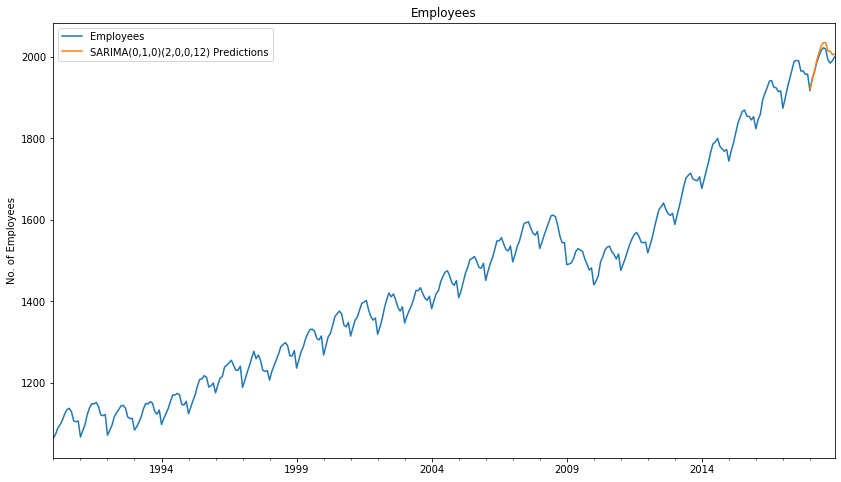

In [23]:
title = 'Employees'
ylabel='No. of Employees'
xlabel=''

ax = df['Employees'].plot(legend=True,figsize=(14,8),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

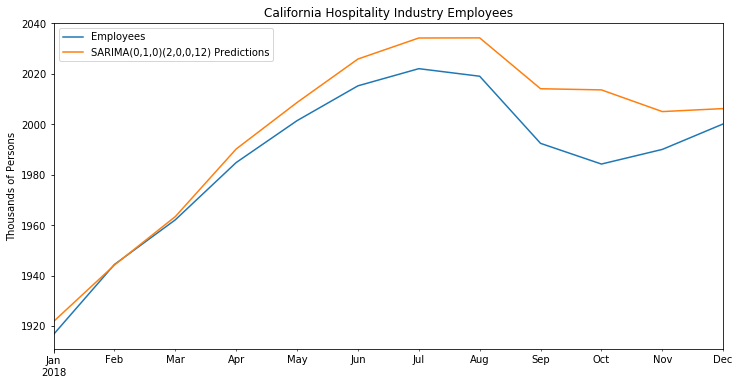

In [8]:
# DON'T WRITE HERE

### 10. Evaluate the Model using MSE and RMSE
You can run both from the same cell if you want.

In [46]:
error = mean_squared_error(test, predictions)
error1 = rmse(test, predictions)
print(f'SARIMA(0,1,0)(2,0,0,12) MSE Error: {error:11.10}')
print(f'SARIMA(0,1,0)(2,0,0,12) RMSE Error: {error1:11.10}')

SARIMA(0,1,0)(2,0,0,12) MSE Error: 2573.662194
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 50.73127432


In [9]:
# DON'T WRITE HERE

SARIMA(0,1,0)(2,0,0,12) MSE Error: 182.8506646
SARIMA(0,1,0)(2,0,0,12) RMSE Error: 13.52222854


### 11. Retrain the model on the full data and forecast one year into the future

In [47]:
# from statsmodels.tsa.ar_model import AR,ARResults

model = SARIMAX(df['Employees'],order=(0,1,0), seasonal_order=(2,0,0,12))

results = model.fit()


fcast = results.predict(len(df), len(df)+11, typ='levels').rename('SARIMA(0,1,0)(2,0,0,12) Forecast')
# # Next, fit the model w/ 11 lags
# ARfit = model.fit(maxlag=11,method='mle')

# # Make predictions into the future
# fcast = ARfit.predict(start=len(df['Employees']), end=len(df['Employees'])+6, dynamic=False).rename('Forecast')

# # Plot the results
# df['Employees'].plot(legend=True)
# fcast.plot(legend=True,figsize=(12,6));

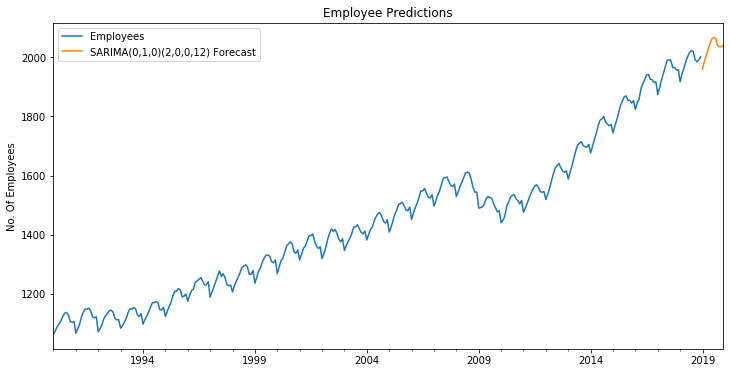

In [48]:
# Plot predictions against known values
title = 'Employee Predictions'
ylabel='No. Of Employees'
xlabel=''

ax = df['Employees'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [10]:
# DON'T WRITE HERE

### 12. Plot the forecasted values alongside the original data
Optional: add a title and y-axis label.

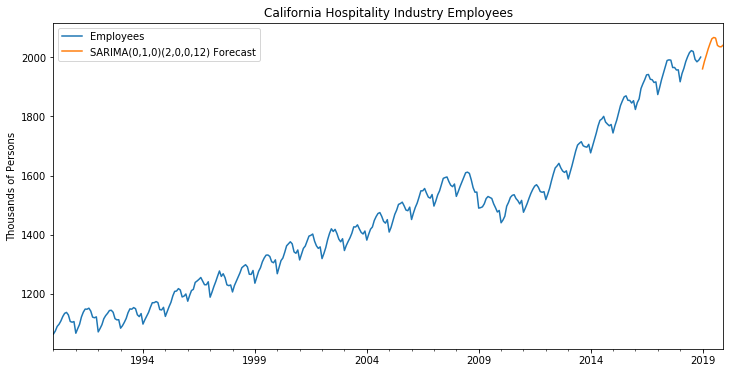

In [11]:
# DON'T WRITE HERE

# 13 Write down a list of potential datasets that you would like to use as exogenous variables to improve your prediction.  

In [3]:
# write list below

## Great job!